In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [24]:
data = pd.read_csv('titanic-passengers.csv',sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [25]:
dt=data.copy()
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [26]:
dt.duplicated().sum()

0

In [27]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
dt.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [28]:
dt['Age'].fillna(dt['Age'].mean(), inplace=True)

In [29]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
dt['Embarked'].fillna("S",inplace=True)

In [31]:
dt['Embarked'].isnull().sum()

0

In [32]:
dt['Embarked'] = dt['Embarked'].fillna(2)
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [33]:
dt['Sex'] = dt['Sex'].map({'male':0, 'female':1})
dt['Embarked'] = dt['Embarked'].map({'C':0, 'Q':1, 'S':2})
dt['Survived'] = dt['Survived'].map({'Yes':0, 'No':1})
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,2
1,76,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,2
2,641,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,2
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,2
4,672,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,2


In [34]:
dt.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [35]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,28.0,0,0,13.0000,2
1,1,3,0,25.0,0,0,7.6500,2
2,1,3,0,20.0,0,0,7.8542,2
3,1,3,1,29.0,0,4,21.0750,2
4,1,1,0,31.0,1,0,52.0000,2


In [38]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,28.0,0,0,13.0000,2
1,1,3,0,25.0,0,0,7.6500,2
2,1,3,0,20.0,0,0,7.8542,2
3,1,3,1,29.0,0,4,21.0750,2
4,1,1,0,31.0,1,0,52.0000,2


In [39]:
dt_tag2=dt['Survived'].copy()

In [40]:
dt_tag2.head()

0    1
1    1
2    1
3    1
4    1
Name: Survived, dtype: int64

<AxesSubplot:>

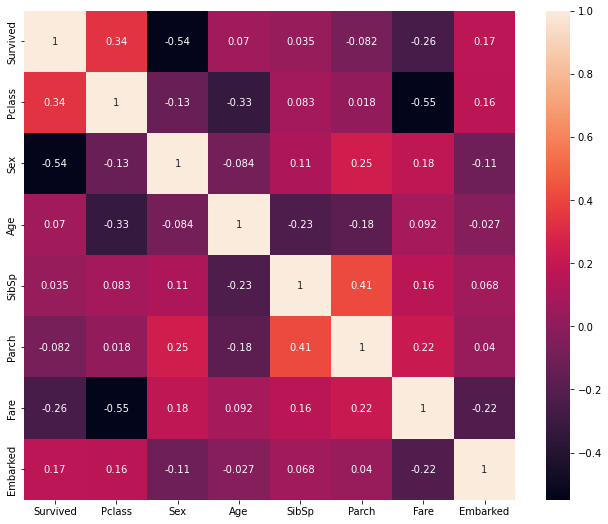

In [44]:
plt.figure(figsize=(11,9))
sns.heatmap(dt.corr(),annot=True)

In [45]:
dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,0,28.0,0,0,13.0000,2
1,1,3,0,25.0,0,0,7.6500,2
2,1,3,0,20.0,0,0,7.8542,2
3,1,3,1,29.0,0,4,21.0750,2
4,1,1,0,31.0,1,0,52.0000,2


# 1. Apply logistic regression. 

In [47]:
x = dt[['Pclass','Sex','Embarked','Age','Fare']]
y = dt['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [48]:
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


# 2. Use a confusion matrix to validate your model. 

<AxesSubplot:xlabel='Prediction du Systeme', ylabel='Réalité'>

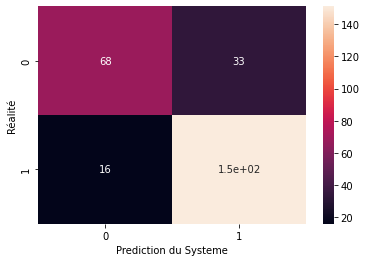

In [50]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Réalité'], colnames=['Prediction du Systeme'])
sns.heatmap(confusion_matrix, annot=True)

<p>True Positive (TP) = 68; 

True Negative (TN) = 1.5e+02;

False Positive (FP) = 16;

False Negative (FN) = 33;</p>

# 3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

Une courbe ROC (receiver operating characteristic curve) est un graphique montrant la performance d'un modèle de classification à tous les seuils de classification. Cette courbe trace deux paramètres :

le taux de vrais positifs
Taux de faux positifs

In [52]:
def accuracy(TP,TN,FP,FN):
    accur=(TP+TN)/(TP+TN+FP+FN)
    return accur
x=accuracy(68,1.5e+02,16,33)
print("Accuracy=",x)

Accuracy= 0.8164794007490637


In [53]:
def precision(TP,FP):
    prec=TP/(TP+FP)
    return prec
y=precision(68,16)
print("Precision=",y)

Precision= 0.8095238095238095


In [54]:
def recall(TP,FN):
    rec=TP/(TP+FN)
    return rec
z=recall(68,33)
print("Recall=",z)

Recall= 0.6732673267326733


In [55]:
AUC = roc_auc_score(y_true=y_test, y_score=y_pred)
print(AUC)

0.7887294717495701
